In [57]:
import sys 
sys.path.append('..')
import networkx as nx 
import quarantines as Q 
import EoNlocal as EoN 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as  sns
import utils
sns.set()

In [2]:
# Want to do the following 
# i) Figure out base: final R, maxI 
# ii) Best possible final R 
# iii) Best possible max I 
# for all the gemsec databases 


In [12]:
GEMSEC_DATA = ['artist', 'athletes', 'company', 'government', 
                 'new_sites', 'politician', 'public_figure', 'tvshow']
def gemsec(s):
    assert s in GEMSEC_DATA
    return nx.read_adjlist('../snap/gemsec_fb/facebook_clean_data/%s_edges.csv' % s)


In [18]:
for _ in GEMSEC_DATA:
    G = gemsec(_)
    if len(_) < 9:
        _ = _ + '      '
    print(_,'\t', len(G),'\t', G.number_of_edges())

artist       	 50517 	 819307
athletes       	 13868 	 86859
company       	 14115 	 52311
government 	 7059 	 89456
new_sites 	 27919 	 206260
politician 	 5910 	 41730
public_figure 	 11567 	 67115
tvshow       	 3894 	 17263


In [28]:
def vanilla_numbers(s, tau, gamma, init_num, num_iter):
    G = gemsec(s)
    N = len(G) 
    rho = init_num / N 
    final_i, final_r = [], []
    for _ in range(num_iter):
        out = EoN.fast_SIR(G, tau, gamma, rho=rho)
        final_i.append(max(out[-2]) / N)
        final_r.append(out[-1][-1] / N)
    return np.mean(final_i), np.mean(final_r)

In [29]:
tau = 0.1
gamma = 0.1
init_num = 10
num_iter = 5
for s in GEMSEC_DATA[::-1]:
    print(s, '/t' vanilla_numbers(s, tau, gamma, init_num, 5))

tvshow (0.31915767847971244, 0.7427324088341037)
public_figure (0.43674245698971215, 0.8241722140572317)
politician (0.4726903553299492, 0.8763113367174281)
new_sites (0.5298685483004406, 0.9047601991475339)
government (0.6168862445105538, 0.9430230910893895)
company (0.3843712362734679, 0.7913708820403826)
athletes (0.5437554081338333, 0.9030141332564178)
artist (0.6272541916582536, 0.9355702040897123)


In [34]:
G1 = gemsec('artist')
len(G1)

50517

In [36]:
tups = Q.quarantine_by_prop(G1, tau, gamma, 10 / len(G1), [0.5], float('inf'), num_iter=3)


In [42]:
tups.get_max_I(), tups.get_final_R()

(23908.666666666668, 35425.666666666664)

In [47]:
def get_propseries(s, tau, gamma, init_num, qrange, num_iter=3):
    G = gemsec(s)
    N = len(G)
    output_trips = [] 
    for qprop in qrange:
        tups = Q.quarantine_by_prop(G, tau, gamma, init_num / N, [qprop], float('inf'), num_iter)
        output_trips.append((qprop, tups.get_max_I() / N, tups.get_final_R() / N))
    return output_trips
    

In [48]:
tvout = get_propseries('tvshow', 0.1, 0.1, 10, [0.02 * _ for _ in range(1, 51)], num_iter=2)

In [65]:
def plot_tripseries(tripseries):
    fig, ax = plt.subplots(figsize=(8,8))
    i_series = [list(utils.selector(_, [0,1])) for _ in tripseries]
    r_series = [list(utils.selector(_, [0,2])) for _ in tripseries]
    
    ax.plot(*zip(*i_series), c='r', label='Max #Infected')
    ax.plot(*zip(*r_series), c='b', label='Final #Recovered')
    ax.legend()

In [68]:
athout = get_propseries('athletes', 0.1, 0.1, 10, [0.02 * _ for _ in range(1, 51)], num_iter=2)

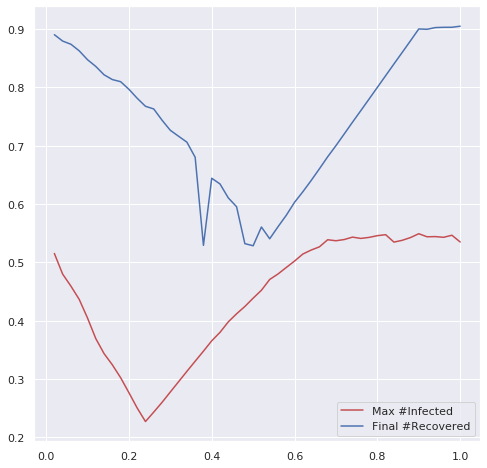

In [69]:
plot_tripseries(athout)

In [71]:
# NOW CHECK HEATMAP STUFF: 
G_tv = gemsec('tvshow')

In [73]:
tvgrid = Q.get_quarantine_grid_data_props(G, 0.1, 0.1, 10 / len(G_tv), float('inf'), [0.04 * _ for _ in range(1, 20)], 
                                 [0.04 * _ for _ in range(1, 20)])

Quarantine @ props p=0.04,0.04
Quarantine @ props p=0.04,0.08
Quarantine @ props p=0.04,0.12
Quarantine @ props p=0.04,0.16
Quarantine @ props p=0.04,0.2
Quarantine @ props p=0.04,0.24
Quarantine @ props p=0.04,0.28
Quarantine @ props p=0.04,0.32
Quarantine @ props p=0.04,0.36
Quarantine @ props p=0.04,0.4
Quarantine @ props p=0.04,0.44
Quarantine @ props p=0.04,0.48
Quarantine @ props p=0.04,0.52
Quarantine @ props p=0.04,0.56
Quarantine @ props p=0.04,0.6
Quarantine @ props p=0.04,0.64
Quarantine @ props p=0.04,0.68
Quarantine @ props p=0.04,0.72
Quarantine @ props p=0.04,0.76
Quarantine @ props p=0.08,0.04
Quarantine @ props p=0.08,0.08
Quarantine @ props p=0.08,0.12
Quarantine @ props p=0.08,0.16
Quarantine @ props p=0.08,0.2
Quarantine @ props p=0.08,0.24
Quarantine @ props p=0.08,0.28
Quarantine @ props p=0.08,0.32
Quarantine @ props p=0.08,0.36
Quarantine @ props p=0.08,0.4
Quarantine @ props p=0.08,0.44
Quarantine @ props p=0.08,0.48
Quarantine @ props p=0.08,0.52
Quarantine @ 

Quarantine @ props p=0.6,0.08
Quarantine @ props p=0.6,0.12
Quarantine @ props p=0.6,0.16
Quarantine @ props p=0.6,0.2
Quarantine @ props p=0.6,0.24
Quarantine @ props p=0.6,0.28
Quarantine @ props p=0.6,0.32
Quarantine @ props p=0.6,0.36
Quarantine @ props p=0.6,0.4
Quarantine @ props p=0.6,0.44
Quarantine @ props p=0.6,0.48
Quarantine @ props p=0.6,0.52
Quarantine @ props p=0.6,0.56
Quarantine @ props p=0.6,0.6
Quarantine @ props p=0.6,0.64
Quarantine @ props p=0.6,0.68
Quarantine @ props p=0.6,0.72
Quarantine @ props p=0.6,0.76
Quarantine @ props p=0.64,0.04
Quarantine @ props p=0.64,0.08
Quarantine @ props p=0.64,0.12
Quarantine @ props p=0.64,0.16
Quarantine @ props p=0.64,0.2
Quarantine @ props p=0.64,0.24
Quarantine @ props p=0.64,0.28
Quarantine @ props p=0.64,0.32
Quarantine @ props p=0.64,0.36
Quarantine @ props p=0.64,0.4
Quarantine @ props p=0.64,0.44
Quarantine @ props p=0.64,0.48
Quarantine @ props p=0.64,0.52
Quarantine @ props p=0.64,0.56
Quarantine @ props p=0.64,0.6
Q

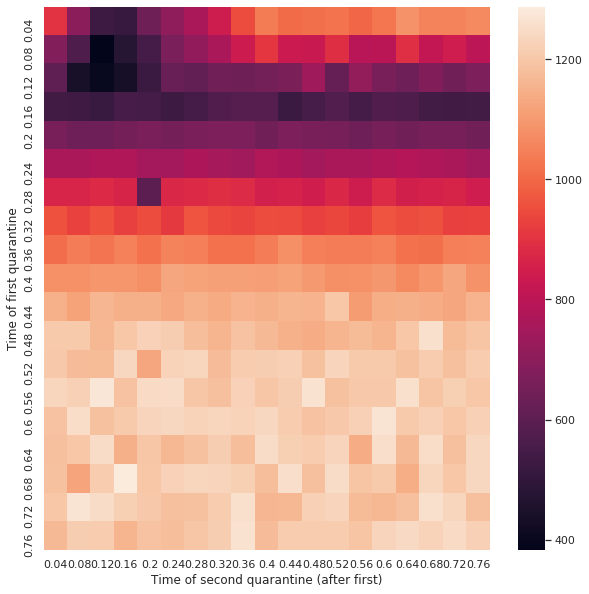

In [79]:
Q.heatmapify(*Q.process_into_grid(tvgrid, Q.AggregateTuple.get_max_I))